# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) November 2022

## Name :- Sairaj Kiran Waykool

### Domain:- Data Science & Business Analytics

##### Task 1 - Prediction using Supervised Machine Learning


#### Problem Statement:

Prediction using Supervised Machine Learning. Predict the percentage of an student based on the number of study hours. What will be the predicted score if a student studies for 9.25hr/day?

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Importing data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Exploring data

In [4]:
data.shape

(25, 2)

Observation:- Data contains 25 rows and 2 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Observation:- Here we can see column name with its datatype

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can see is there outlier present in the data or not

<AxesSubplot:xlabel='Hours'>

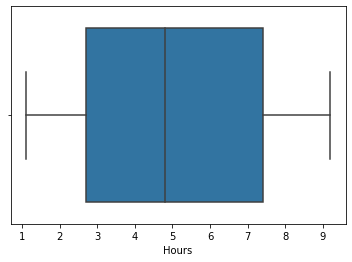

In [7]:
sns.boxplot(data['Hours'])

<AxesSubplot:xlabel='Scores'>

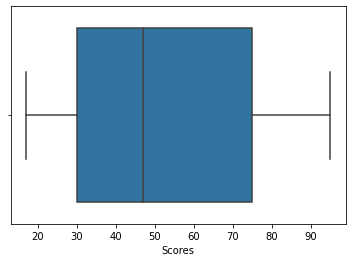

In [8]:
sns.boxplot(data['Scores'])

Observation:- No outliers present in our dataset

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


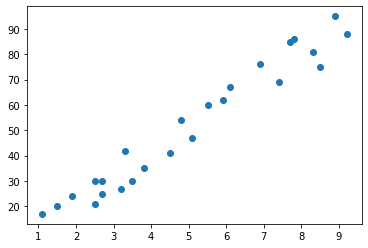

In [10]:
plt.scatter(data['Hours'],data['Scores'])

 Observation:- There is corelation between Hours and Scores

In [11]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Importing linear regression for model training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()  
regression.fit(X_train, y_train) 

LinearRegression()

In [14]:
#Printing the regression coefficient and intercept
print(regression.coef_)
print(regression.intercept_)

[9.68207815]
2.826892353899737


In [15]:
#Prediction for the test data
reg_pred = regression.predict(X_test)
reg_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

##### There is three assumption when we can say model is properly created with the respect to linear regression


###### Lets start with first assumption

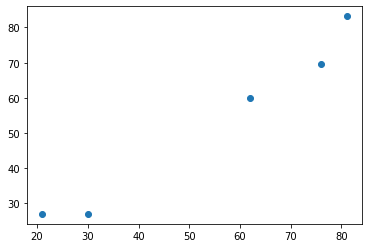

In [16]:
#1. When we see scatter plot of y_test and reg_pred, it should be linear.
plt.scatter(y_test, reg_pred)

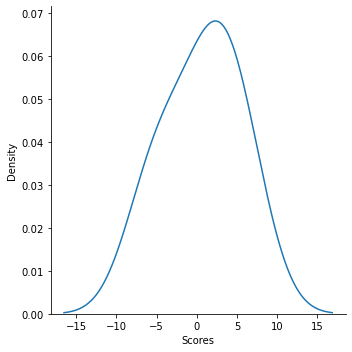

In [17]:
#2. When we see distance plot for residual, it should be normally distributed
residual = y_test-reg_pred
sns.displot(residual, kind='kde')

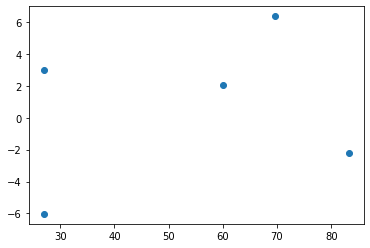

In [18]:
#3. When we see scatter plot of reg_pred and residual, it should be uniformly distributed. This term is called Homoscedosity
plt.scatter(reg_pred, residual)

In [19]:
#Computing training and testing accuracy score
print('training score: ', regression.score(X_train, y_train))
print('training score: ', regression.score(X_test, y_test))

training score:  0.9491209376364416
training score:  0.9678055545167994


In [24]:
## Problem Statement 
## What will be predicted score if a student study for 9.25 hrs in a day?

hours=9.25
reg_score_pred = regression.predict([[hours]])
print('No. of study hours = {}'.format(hours))
print('Predicted score= {}'.format(reg_score_pred[0]))

No. of study hours = 9.25
Predicted score= 92.38611528261494


Observation : The predicted score when a student studies for 9.25 hrs/day is 92.38 percent

### Performance Metrics

In [27]:
#Importing MAE and MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

18.943211722315272
3.9207511902099244
4.352380006653288


Observation : If value of MAE and MSE is close to zero, then model will be more accurate.

In [29]:
#Computing R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.9678055545167994

In [30]:
#Computing adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9570740726890659

#### Conclusion


Accuracy of model is good to predict score based on the number of study hours

The model predicted 92.38 percent score if a student studies for 9.25 hours/day.


## Thank you